# 📈 Task 2: Predict Future Stock Prices (Short-Term)

In this notebook, we'll:
- Fetch real historical stock data using `yfinance`
- Build a regression model to predict the next day’s closing price
- Visualize predicted vs actual results

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import yfinance as yf

sns.set(style="whitegrid", palette="muted")

## 📥 Load Stock Data from Yahoo Finance

We’ll use `yfinance` to load recent stock data for Apple (`AAPL`) for the last 3 years.

In [29]:
data = yf.download("AAPL", period="3y")
data.head()

/tmp/ipython-input-29-4107354030.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", period="3y")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-07-25,150.534897,152.591892,149.875478,151.578157,53623900
2022-07-26,149.206223,150.672686,148.418852,149.855790,55138700
2022-07-27,154.314285,154.845767,149.757403,150.170769,78620700
2022-07-28,154.865448,155.150862,151.971868,154.501280,81378700
2022-07-29,159.943985,161.046311,156.981518,158.694049,101786900


## 🔍 Data Overview

Let’s explore the dataset: columns, shape, and summary statistics.

In [30]:
print("Shape:", data.shape)
print("\nColumns:", data.columns.tolist())
data.describe()

Shape: (754, 5)

Columns: [('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,754.000000,754.000000,754.000000,754.000000,7.540000e+02
mean,187.657998,189.439575,185.669665,187.445129,6.147495e+07
std,31.201139,31.345779,30.947759,31.153291,2.611918e+07
min,123.421257,126.136090,122.582112,124.398589,1.579133e+07
25%,166.042900,167.642252,164.850089,166.406629,4.557602e+07
50%,185.457214,186.906271,183.165821,185.342719,5.455150e+07
75%,213.485622,215.728298,211.160595,213.112660,7.005660e+07
max,258.396667,259.474086,257.010028,257.568678,3.186799e+08


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2022-07-25 to 2025-07-25
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   754 non-null    float64
 1   (High, AAPL)    754 non-null    float64
 2   (Low, AAPL)     754 non-null    float64
 3   (Open, AAPL)    754 non-null    float64
 4   (Volume, AAPL)  754 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.3 KB


## 🧹 Data Preprocessing

We’ll use `Open`, `High`, `Low`, and `Volume` as features to predict the next day’s `Close` price.

In [32]:
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## 🧠 Train Linear Regression Model

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## 📏 Model Evaluation

In [34]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Regression RMSE: {rmse:.2f}")
print(f"Regression R² Score: {r2:.4f}")

Regression RMSE: 4.94
Regression R² Score: 0.9285


## 📉 Visualizing Actual vs Predicted Closing Prices

/tmp/ipython-input-35-1176381975.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


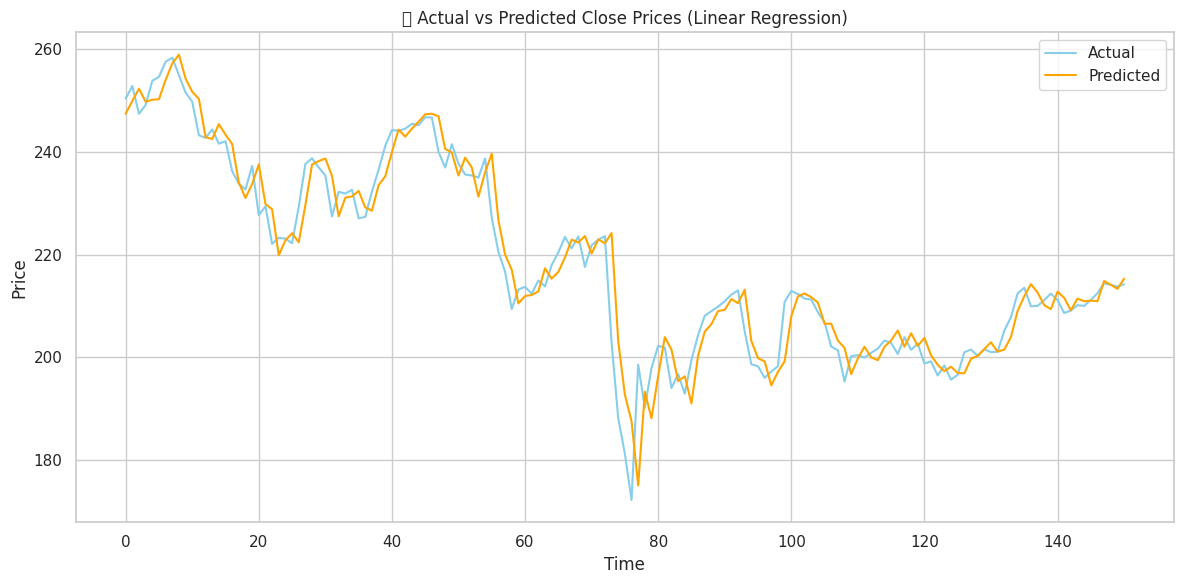

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='skyblue')
plt.plot(y_pred, label='Predicted', color='orange')
plt.title('📊 Actual vs Predicted Close Prices (Linear Regression)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

## 🌲 Optional: Try Random Forest Regressor

In [36]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest RMSE: {rf_rmse:.2f}")
print(f"Random Forest R²: {rf_r2:.4f}")

Random Forest RMSE: 6.91
Random Forest R²: 0.8597


/tmp/ipython-input-37-1241889896.py:8: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


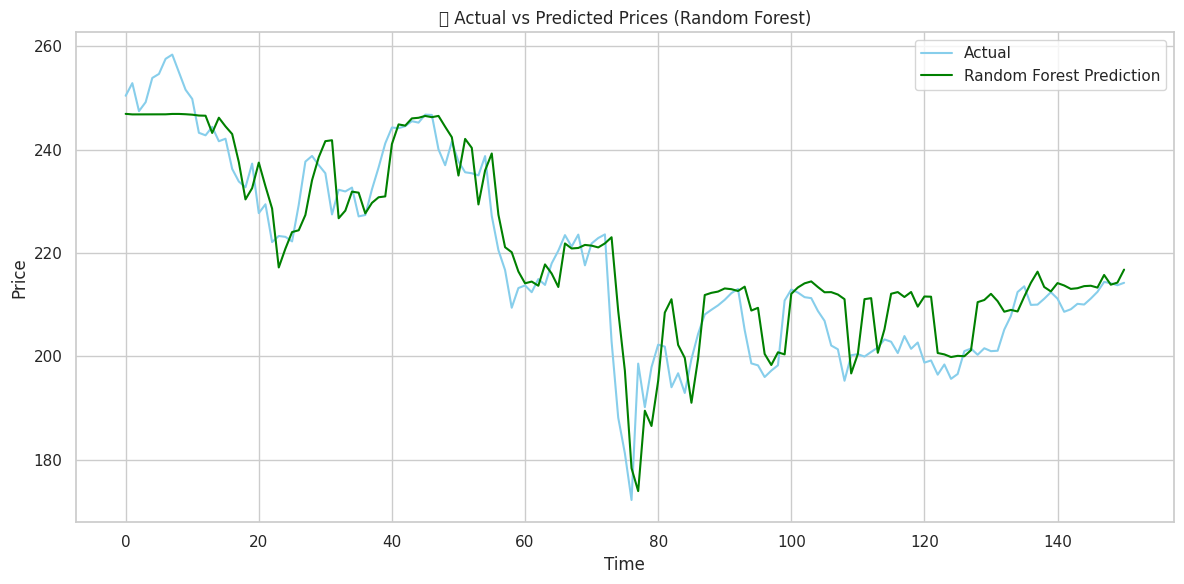

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='skyblue')
plt.plot(rf_pred, label='Random Forest Prediction', color='green')
plt.title('🌲 Actual vs Predicted Prices (Random Forest)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

## 📈 Apple Closing Price Over Time

This line chart shows how Apple's closing price has changed over the last 3 years.


/tmp/ipython-input-38-1204294272.py:7: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


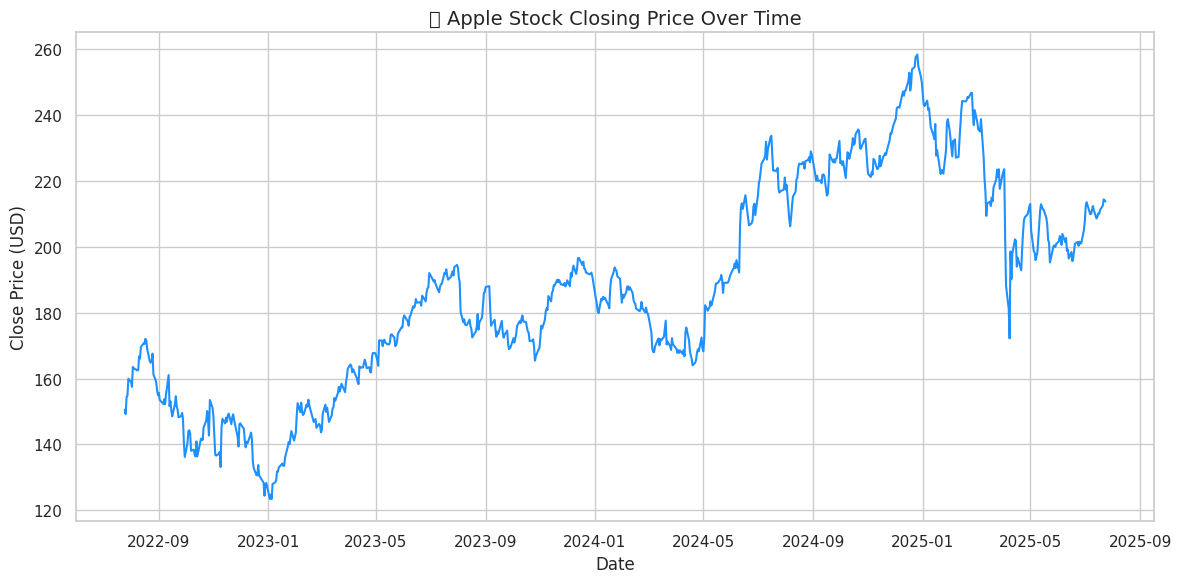

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], color='dodgerblue')
plt.title("📈 Apple Stock Closing Price Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


## 🕯️ Apple OHLC Price Comparison

This plot compares Open, High, Low, and Close prices across the dataset.






/tmp/ipython-input-39-1124832122.py:10: UserWarning: Glyph 128367 (\N{CANDLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128367 (\N{CANDLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


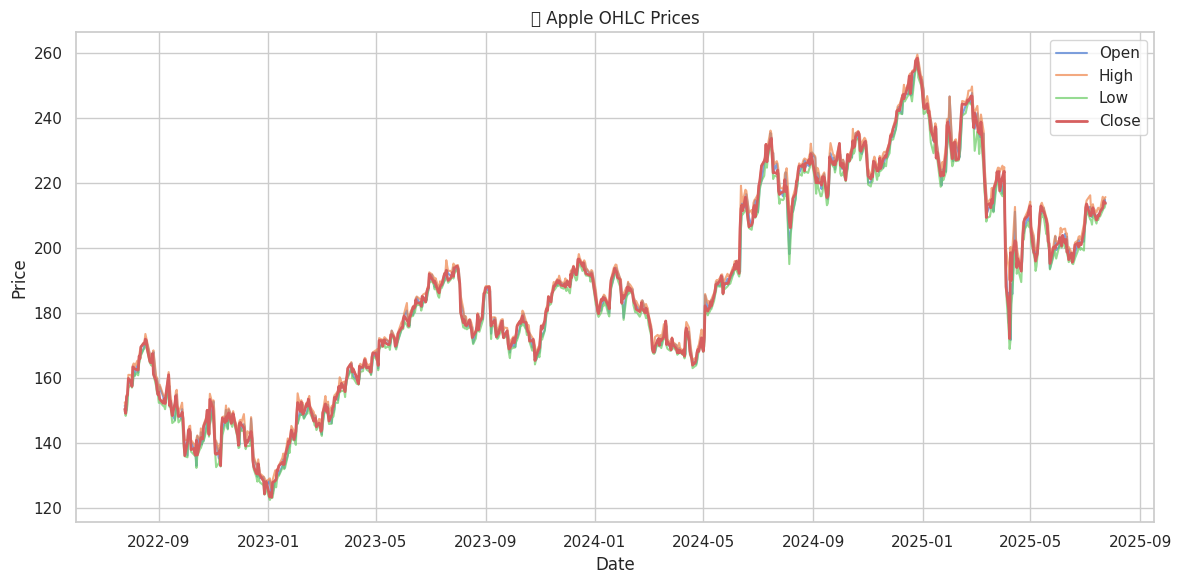

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(data['Open'], label='Open', alpha=0.7)
plt.plot(data['High'], label='High', alpha=0.7)
plt.plot(data['Low'], label='Low', alpha=0.7)
plt.plot(data['Close'], label='Close', linewidth=2)
plt.title("🕯️ Apple OHLC Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()


## 📊 Apple Trading Volume Over Time

Shows how the number of shares traded daily fluctuates.


/tmp/ipython-input-40-1077654925.py:6: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


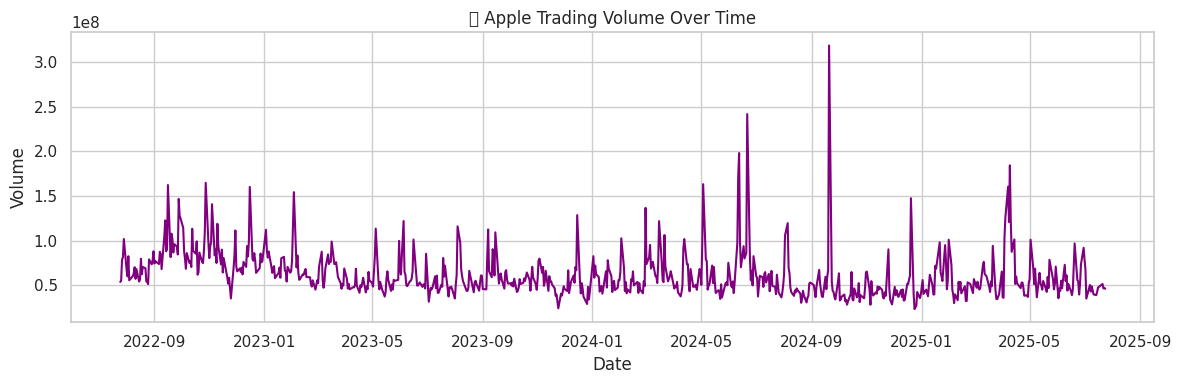

In [40]:
plt.figure(figsize=(12, 4))
plt.plot(data['Volume'], color='purple')
plt.title("📊 Apple Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.tight_layout()
plt.show()


## 🔥 Feature Correlation Heatmap

Displays relationships between stock features like High, Low, Open, Close, and Volume.


/tmp/ipython-input-41-1446871916.py:4: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


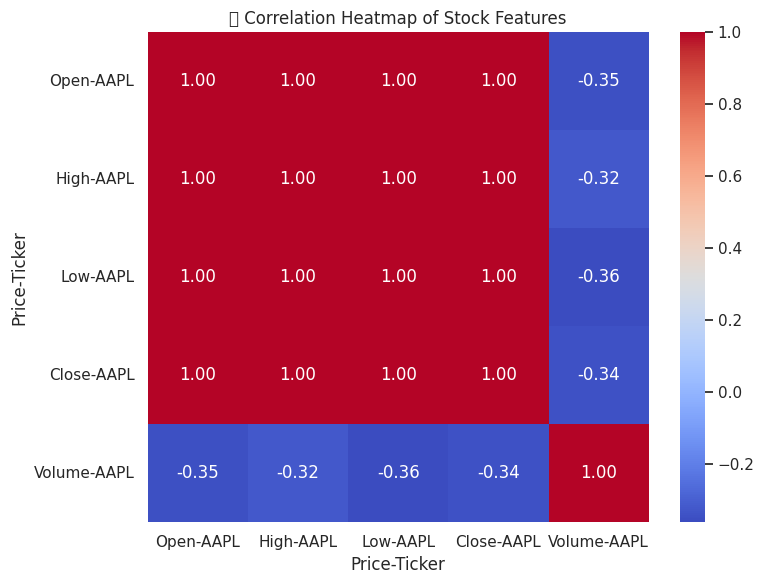

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔥 Correlation Heatmap of Stock Features")
plt.tight_layout()
plt.show()


## 📉  Distribution of Daily Returns

Histogram of daily returns to visualize market volatility.




/tmp/ipython-input-42-3871959547.py:7: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


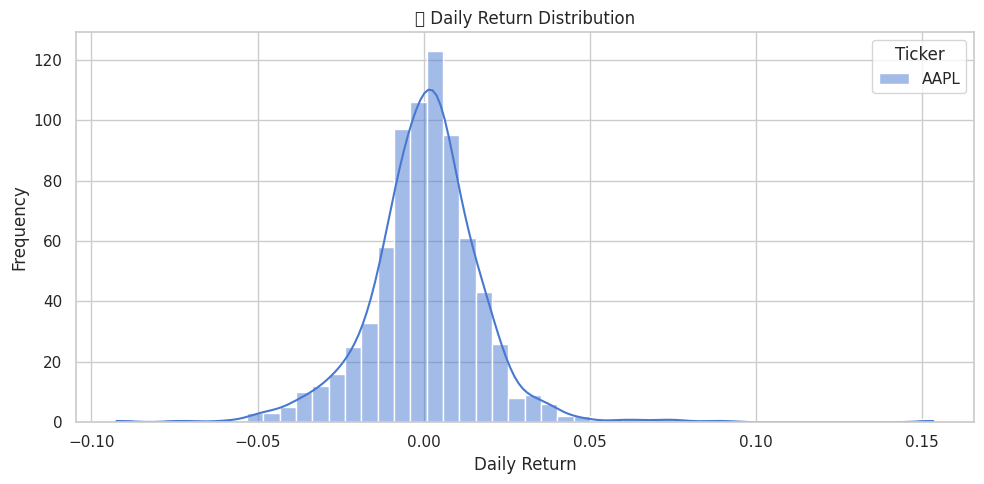

In [42]:
daily_return = data['Close'].pct_change().dropna()
plt.figure(figsize=(10, 5))
sns.histplot(daily_return, bins=50, kde=True, color='salmon')
plt.title("📉 Daily Return Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


## 📦 Yearly Boxplot of Closing Prices

This plot helps identify yearly price range, outliers, and volatility.


/tmp/ipython-input-43-47408487.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Year', y=data['Close']['AAPL'], palette='Set2')


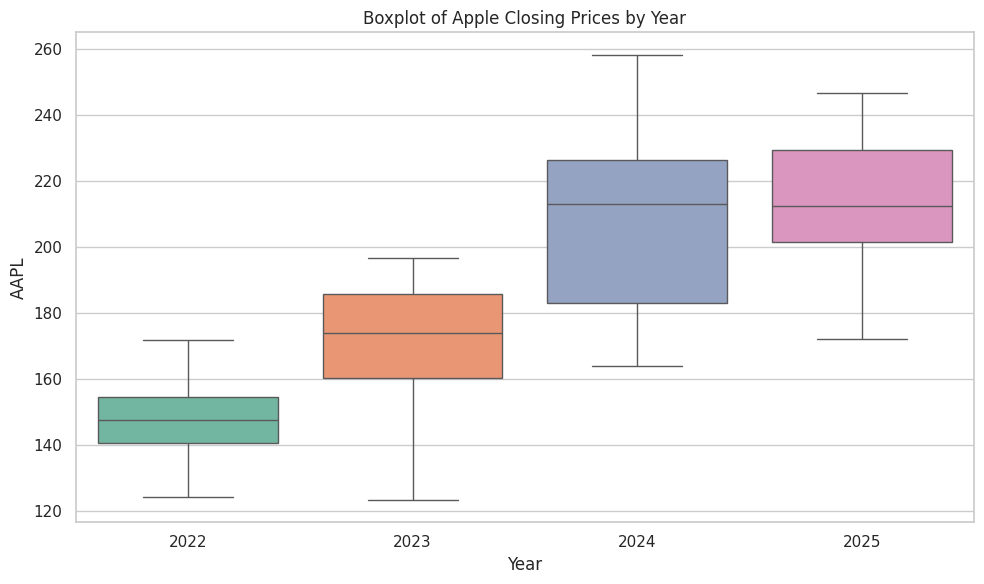

In [43]:
data['Year'] = data.index.year
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Year', y=data['Close']['AAPL'], palette='Set2')
plt.title("Boxplot of Apple Closing Prices by Year")
plt.tight_layout()
plt.show()

## 📈 20-day and 50-day Moving Averages

Shows smoothed trends to highlight support/resistance zones.


/tmp/ipython-input-44-3742821970.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


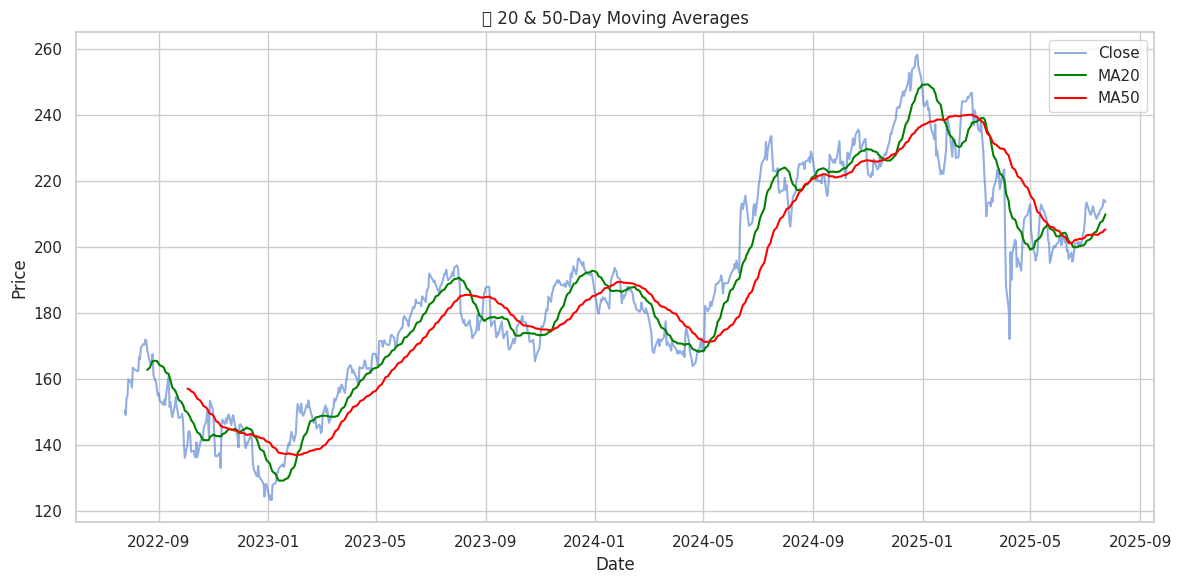

In [44]:
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close', alpha=0.6)
plt.plot(data['MA20'], label='MA20', color='green')
plt.plot(data['MA50'], label='MA50', color='red')
plt.title("📈 20 & 50-Day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()


## 🔁 Volume vs Closing Price

Shows the relationship between trading volume and closing price.


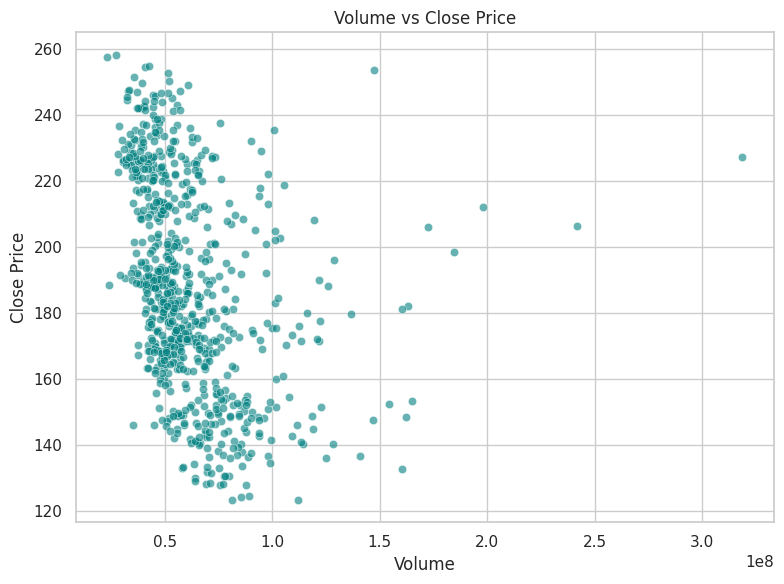

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data[('Volume', 'AAPL')], y=data[('Close', 'AAPL')], alpha=0.6, color='teal')
plt.title("Volume vs Close Price")
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.tight_layout()
plt.show()

## 🔍 High vs Low Colored by Close Price

Scatter plot to inspect spread between high and low prices, with color indicating closing price.


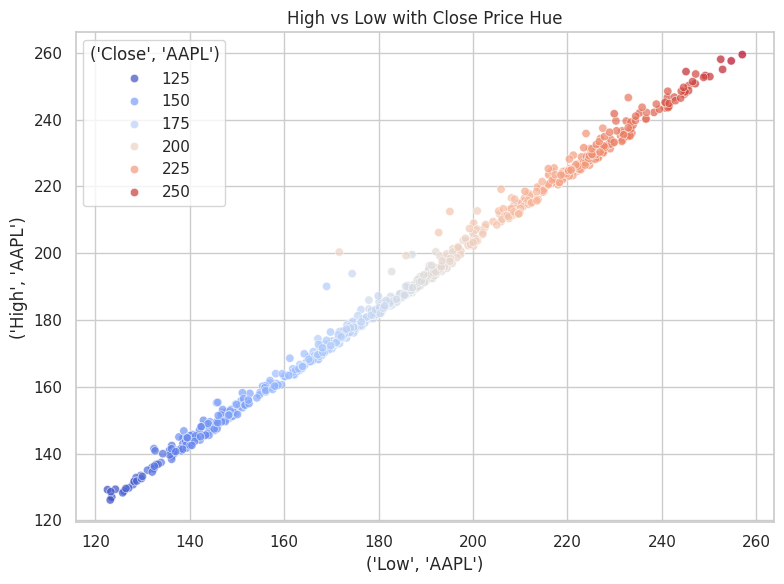

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x=('Low', 'AAPL'), y=('High', 'AAPL'), hue=('Close', 'AAPL'), palette='coolwarm', alpha=0.7)
plt.title("High vs Low with Close Price Hue")
plt.tight_layout()
plt.show()

## 📊  Close Price with Prediction Test Split Highlight

Visual separation of training and test periods used in prediction.


/tmp/ipython-input-47-3338486835.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


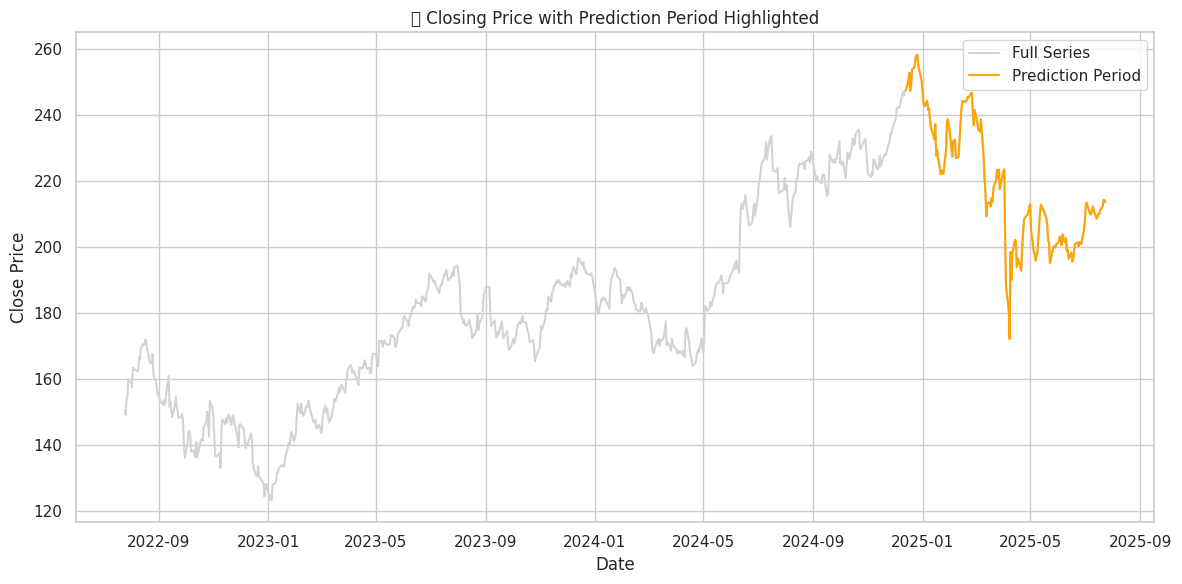

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Full Series', color='lightgray')
test_index = X_test.index
plt.plot(data.loc[test_index, 'Close'], label='Prediction Period', color='orange')
plt.title("📊 Closing Price with Prediction Period Highlighted")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()


## ✅ Conclusion

- Linear Regression and Random Forest were trained on stock features to predict next-day closing prices.
- Random Forest often performs better for non-linear stock patterns.
- RMSE and R² metrics provide a quantitative view of model accuracy.